# Задание 1 (Вариант 5)
Все выкладки находятся в письменном виде в `notes/`

Распределение выборки: $U[0,\theta]$

Априорное распределение: $\operatorname{Pareto}(x_0,\alpha)$ (в моём варианте - $\operatorname{Pareto}(1,1)$)

Апостериорное распределение: $\operatorname{Pareto}(max(X_{(n)},x_0), n+\alpha)$ (в моём варианте - $\operatorname{Pareto}(max(X_{(n)},1), n+1)$)

Математическое ожидание: $E_{\theta}(T^{*})=
    \frac{n+\alpha}{n+\alpha-1}
    \cdot\frac{1}{\theta^n}
    \cdot\frac{x_0^{n+1}}{n+1} +
    \frac{n+\alpha}{n+\alpha-1}
    \cdot\frac{n}{n+1}
    \cdot\theta$

Смещение ($E_{\theta}(T^{*})-\theta$): $E_{\theta}(T^{*}) - \theta=
    \frac{n+\alpha}{n+\alpha-1}
    \cdot\frac{1}{\theta^n}
    \cdot\frac{x_0^{n+1}}{n+1} +
    \frac{n+\alpha}{n+\alpha-1}
    \cdot\frac{n}{n+1}
    \cdot\theta -
    \theta
    \xrightarrow[n\rightarrow\infty]{} 0$

Дисперсия: $DT^{*}=
\left(
    \frac{2x_0^{n+2}}{\theta^n(n+2)} -
    \frac{x_0^{2n+2}}{\theta^{2n}(n+1)^2} +
    \frac{\theta^2n}{(n+2)(n+1)^2} +
    \frac{2nx_0^{n+1}}{\theta^{n-1}(n+1)^2}
\right) \cdot
\left(
    \frac{n+\alpha}{n+\alpha-1}
\right)^2
\xrightarrow[n\rightarrow\infty]{} 0$

Среднеквадратическая ошибка: $R(T^{*},\theta)=
E_{\theta} e(T^{*},\theta)=
E_{\theta} (T-\theta)^2=
\theta^2 \cdot
\left(
    \left(
        \frac{n+\alpha}{n+\alpha-1}
    \right)^2 \cdot \frac{n}{n+2} +
    1 -
    2 \cdot \frac{n+\alpha}{n+\alpha-1} \cdot \frac{n}{n+1}
\right) +
\frac{x_0^n}{\theta^n} \cdot
\left(
    \left(
        \frac{n+\alpha}{n+\alpha-1}
    \right)^2 \cdot \frac{2x_0^2}{n+2} -
    2 \cdot \frac{n+\alpha}{n+\alpha-1} \cdot \frac{x_0\theta}{n+1}
\right)
\xrightarrow[n\rightarrow\infty]{} 0$

Байесовский риск: получил расходящийся интеграл при $\alpha <= 2$

Нужно провести 500 экспериментов с $\theta$ из априорного распределения ($n=100$)

In [39]:
import numpy as np

RNG = np.random.default_rng(0)

experiments = 500
n = 100000

# m === x0 - scale
m = 1.0
# a === alpha - shape
a = 1.0

theta = RNG.pareto(a, size=experiments)
exps = np.array([RNG.uniform(0, th, size=n) for th in theta])

np.info(exps)
# exps

class:  ndarray
shape:  (500, 100000)
strides:  (800000, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7fa35c287010
byteorder:  little
byteswap:  False
type: float64


Оценка отличается от настоящего значения более чем на 0.05 236 раз (всего 500 экспериментов)


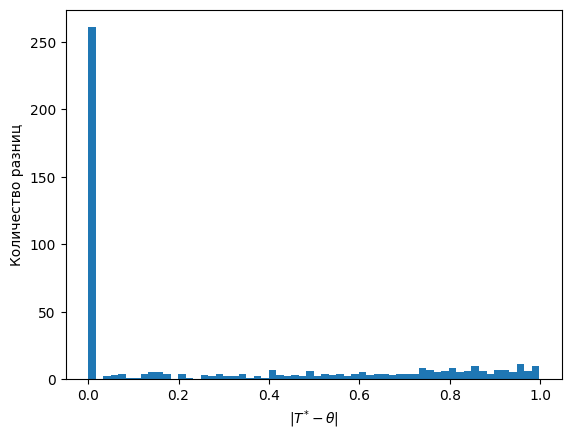

In [40]:
bayesEstimator = (n+a)/(n+a-1)*np.clip(np.amax(exps, axis=1), a_min=m, a_max=None)

diff = abs(bayesEstimator - theta)
print("Оценка отличается от настоящего значения более чем на 0.05 {} раз (всего {} экспериментов)".format((diff > 0.05).sum(), experiments))

import matplotlib.pyplot as plt

plt.hist(diff, bins=60)
plt.xlabel(r'$\left|T^{*}-\theta\right|$')
plt.ylabel('Количество разниц')
plt.show()

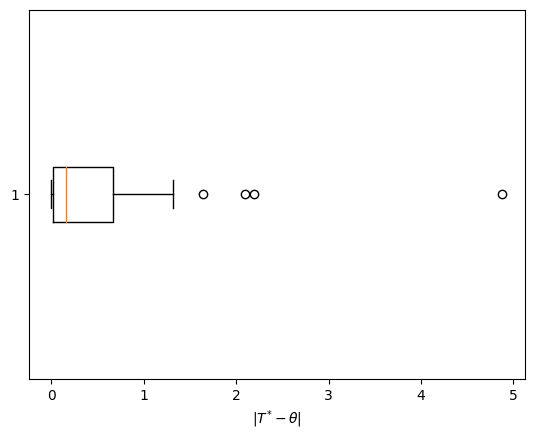

In [38]:
plt.boxplot(diff, vert=False)
plt.xlabel(r'$\left|T^{*}-\theta\right|$')
plt.show()